## Data Preprocessing and Quality Assurance

We will focus on:

1. Data Hygiene: Handling missing values and "cleaning" sensor noise.

2. Exploratory Data Analysis (EDA): Visualizing data to find correlations and outliers.

3. Feature Scaling: Normalizing data so large values (like Pressure) don't overpower small values (like Vacuum).


### 1. Setup

In [7]:
 !pip install pandas matplotlib seaborn numpy scikit-learn


  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 12.5 MB/s  0:00:00 eta 0:00:01
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 28.0 MB/s  0:00:00 eta 0:00:01
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]


### 2. Loading the Libraries and Dataset

In [4]:
# ==========================================
# Step 1: Library Installation & Import
# ==========================================

# We start by importing the necessary libraries.
# Pandas: For data manipulation (like Excel for Python).
# Seaborn & Matplotlib: For visualization (graphs/charts).
# Scikit-learn: For preprocessing (scaling) and machine learning tools.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer

# Configure visual settings for better readability in Colab
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("✅ Libraries imported successfully!")


# ==========================================
# Step 2: Load Data from GitHub
# ==========================================

# Replace the link below with the "Raw" link to the CSV you uploaded to GitHub.
# If you haven't uploaded it yet, run the "Data Breaker Script" provided separately.

raw_url = "/Users/vivaansharma/Desktop/ML-DL-Notebooks/16th_December/Combined_Cycle_Power_Plant_Data.csv"



try:
    df = pd.read_csv(raw_url)
    print("✅ Dataset loaded successfully!")
    
    # Check dimensions
    print(f"Data Shape: {df.shape} (Rows, Columns)")
    
    # Check for missing values immediately
    print("\nInitial Health Check (Missing Values):")
    print(df.isnull().sum())
    
except Exception as e:
    print(f"❌ Error loading data: {e}")
    print("Double-check that your GitHub link is the 'Raw' version.")

✅ Libraries imported successfully!
✅ Dataset loaded successfully!
Data Shape: (9568, 5) (Rows, Columns)

Initial Health Check (Missing Values):
AT    478
V       0
AP      0
RH    478
PE      0
dtype: int64


### 3. Data Hygiene
Real-world sensor data often has "gaps" (missing values) or "noise" (random spikes). Even though the CCPP dataset is clean, we will write code to simulate how to handle these issues so you can apply it to your own engineering datasets later.

#### 3.1 Handling Missing Data (Imputation)


In [5]:
# ==========================================
# Step 3: Imputation (Fixing Broken Data)
# ==========================================

# 1. Visualize the specific rows that are broken
print("Rows with missing sensor data (Sample):")
# This filters to show only rows where at least one value is NaN
rows_with_nan = df[df.isnull().any(axis=1)]
display(rows_with_nan.head())

# 2. Define the Imputer
# Strategy='mean' will calculate the average of every column
imputer = SimpleImputer(strategy='mean')

# 3. Apply the Imputer
# fit_transform() calculates the mean and fills the gaps in one step
df_clean_array = imputer.fit_transform(df)

# 4. Convert back to DataFrame
# (Scikit-Learn returns a plain array, so we add column names back)
df_clean = pd.DataFrame(df_clean_array, columns=df.columns)

print("\n" + "="*40)
print("🛠️ REPAIR COMPLETE 🛠️")
print("="*40)

# Check if any NaN remain
print("Missing values after imputation:")
print(df_clean.isnull().sum())

# Update our main variable 'df' to use the clean data
df = df_clean

Rows with missing sensor data (Sample):


,AT,V,AP,RH,PE
0,NaN,41.76,1024.07,NaN,463.26
3,NaN,57.32,1010.24,NaN,446.48
14,NaN,69.34,1009.48,NaN,433.99
23,NaN,63.90,1014.30,NaN,443.61
29,NaN,65.18,1012.69,NaN,437.89



🛠️ REPAIR COMPLETE 🛠️
Missing values after imputation:
AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64


### 4. Exploratory Data Analysis (EDA)


Now that the data is clean, we look for patterns.

Correlation Matrix: Does Temperature affect Power Output? Does Humidity?

Outlier Detection: Are there any physical impossibilities in the data?

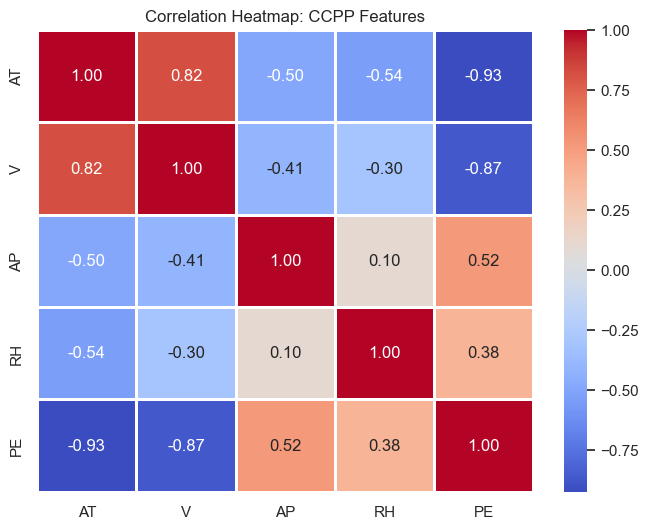

In [8]:
# ==========================================
# Step 4: Correlation Analysis
# ==========================================

# Calculate the correlation matrix
corr = df.corr()

# Plotting the Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1)
plt.title("Correlation Heatmap: CCPP Features")
plt.show()

# Interpretation:
# 1. Look at 'PE' (Power Energy) row.
# 2. 'AT' (Temperature) is -0.93 (Strong Negative).
#    Result: As Temperature rises, Power Output drops significantly.
# 3. 'RH' (Humidity) is +0.38 (Weak Positive).
#    Result: Humidity has a smaller effect on power output.

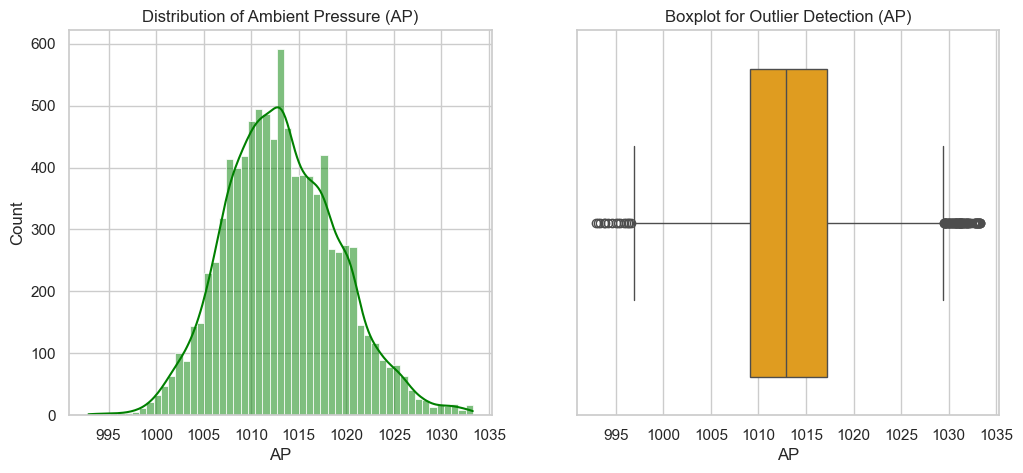

In [7]:
# ==========================================
# Step 5: Distribution & Outliers
# ==========================================

# Let's analyze Ambient Pressure (AP)
plt.figure(figsize=(12, 5))

# 1. Histogram (Distribution)
plt.subplot(1, 2, 1)
sns.histplot(df['AP'], kde=True, color='green')
plt.title("Distribution of Ambient Pressure (AP)")

# 2. Boxplot (Outliers)
plt.subplot(1, 2, 2)
sns.boxplot(x=df['AP'], color='orange')
plt.title("Boxplot for Outlier Detection (AP)")

plt.show()

# Interpretation:
# If you see dots outside the "whiskers" of the boxplot, those are statistical outliers.
# In sensor data, outliers could mean a malfunction or an extreme weather event.

### 5. Feature Scaling


Machine Learning models usually perform better when all inputs are on the same scale.

Ambient Pressure (AP): ~1000
Exhaust Vacuum (V): ~50

Without scaling, the model might think Pressure is "20 times more important" than Vacuum just because the number is bigger.

In [9]:
# ==========================================
# Step 6: Feature Scaling (Standardization)
# ==========================================

# Initialize the Scaler
scaler = StandardScaler()

# Select features (Inputs) only, dropping the Target (PE)
X = df.drop(columns=['PE'])
y = df['PE']

# Apply scaling to Inputs
X_scaled_array = scaler.fit_transform(X)

# Convert back to DataFrame for viewing
X_scaled = pd.DataFrame(X_scaled_array, columns=X.columns)

# Visual Proof
print("Original Data (First 3 rows):")
display(X.head(3))

print("\nScaled Data (First 3 rows) - Notice values are centered around 0:")
display(X_scaled.head(3))

# Verify the math
print(f"\nMean of Scaled Temperature: {X_scaled['AT'].mean():.2f} (Should be ~0)")
print(f"Std Dev of Scaled Temperature: {X_scaled['AT'].std():.2f} (Should be ~1)")

Original Data (First 3 rows):


,AT,V,AP,RH
0,19.6429,41.76,1024.07,73.342818
1,25.1800,62.96,1020.04,59.080000
2,5.1100,39.40,1012.16,92.140000



Scaled Data (First 3 rows) - Notice values are centered around 0:


,AT,V,AP,RH
0,-4.888567e-16,-0.987297,1.820488,0.000000
1,7.619101e-01,0.681045,1.141863,-1.004730
2,-1.999741e+00,-1.173018,-0.185078,1.324149



Mean of Scaled Temperature: -0.00 (Should be ~0)
Std Dev of Scaled Temperature: 1.00 (Should be ~1)


### 6. Conclusion

In this session, we have:

Loaded a raw, messy dataset from a URL.

Imputed missing values to save data.

Visualized the physics of the plant (Temperature vs Power).

Scaled the features to prepare for AI training.
